## Rotating a Point Using a Rotation Matrix

The code below defines a function `rotate_point` that rotates a 2D point \((x, y)\) by a given angle (in degrees) counter-clockwise about the origin. The rotation is performed using the following rotation matrix:

\[
R(\theta) = \begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{pmatrix}
\]

where \(\theta\) is the rotation angle in radians. The function converts the input angle from degrees to radians, constructs the rotation matrix, and applies the matrix multiplication to rotate the point.

### Explanation

1. **Angle Conversion:**  
   The function converts the input angle from degrees to radians using `np.deg2rad()`, because NumPy's trigonometric functions expect the angle in radians.

2. **Rotation Matrix Construction:**  
   The \(2 \times 2\) rotation matrix is constructed as:
   \[
   R(\theta) = \begin{pmatrix}
   \cos(\theta) & -\sin(\theta) \\
   \sin(\theta) & \cos(\theta)
   \end{pmatrix}
   \]
   This matrix rotates a point by \(\theta\) radians in a counter-clockwise direction.

3. **Point Rotation:**  
   The point \((x, y)\) is represented as a NumPy array. The rotation is performed by multiplying this vector by the rotation matrix using the `@` operator, which handles matrix multiplication.

4. **Example Output:**  
   In the example, the point \((1, 0)\) is rotated by 90°. The expected result is approximately \((0, 1)\), accounting for floating-point precision.


In [ ]:
import numpy as np

def rotate_point(x, y, theta_deg):
    """Rotate point (x, y) by theta_deg degrees counter-clockwise about the origin."""
    theta = np.deg2rad(theta_deg)               # convert degrees to radians
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    vec = np.array([x, y])
    rotated_vec = R @ vec                       # matrix multiply R * vec
    return rotated_vec

# Example: rotate the point (1, 0) by 90 degrees
pt = np.array([1, 0])
rotated_pt = rotate_point(pt[0], pt[1], 90)
print("Original point:", pt)
print("Point rotated by 90°:", rotated_pt)


    ## Rotating a Triangle Shape

The code below defines a triangle (a right triangle) and rotates it by a specified angle (45°) using the previously defined `rotate_point` function. Both the original and rotated triangles are plotted on the same graph so that you can visually compare the transformation.


### Explanation

1. **Define the Shape:**  
   A NumPy array named `shape` contains three points: \((0, 0)\), \((3, 0)\), and \((0, 2)\). These points form a right triangle.

2. **Rotation:**  
   - A rotation angle (`theta`) of 45° is specified.
   - The list comprehension `[rotate_point(x, y, theta) for x, y in shape]` applies the `rotate_point` function (which rotates a point by a given angle) to each vertex of the triangle.
   - The result is stored in `rotated_shape`, which contains the rotated coordinates.

3. **Plotting:**  
   - The original triangle is plotted in blue with markers at each vertex.
   - The triangle is "closed" by appending the first point to the end of the array using `np.vstack`.
   - The rotated triangle is similarly plotted in red.
   - Horizontal and vertical lines are drawn for reference.
   - The plot is given a title and an equal aspect ratio is enforced with `plt.gca().set_aspect('equal', 'box')` to ensure the rotation is accurately represented.

This example demonstrates how to apply a rotation transformation to a set of points and visualize the results.


In [ ]:
import matplotlib.pyplot as plt

# Define a triangle shape (3 points forming a right triangle)
shape = np.array([[0, 0], [3, 0], [0, 2]])  # points: (0,0), (3,0), (0,2)
theta = 45  # rotation angle in degrees

# Rotate all points in the shape
rotated_shape = np.array([rotate_point(x, y, theta) for x, y in shape])

# Plot original and rotated shape
plt.figure(figsize=(4,4))
plt.plot(*shape.T, marker='o', color='blue', label='Original shape')
plt.plot(*np.vstack([shape, shape[0]]).T, color='blue')  # close the triangle
plt.plot(*rotated_shape.T, marker='o', color='red', label=f'Rotated shape ({theta}°)')
plt.plot(*np.vstack([rotated_shape, rotated_shape[0]]).T, color='red')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend()
plt.title("Triangle Shape Before and After Rotation")
plt.gca().set_aspect('equal', 'box')
plt.show()


## Calculating the Dot Product, Norms, and Angle Between Two Vectors

This code demonstrates basic linear algebra operations on two example vectors (which could represent velocities of two animals, for instance). The operations performed are:

1. **Dot Product:**  
   The dot product of two vectors is calculated by multiplying the corresponding components and summing the results.  
   For vectors a = [2, 3] and b = [4, 1], it is computed as:  
   (2 * 4) + (3 * 1).

2. **Norm (Magnitude):**  
   The norm of a vector is its length, calculated as the square root of the sum of the squares of its components.  
   For example, the norm of vector a = [2, 3] is:  
   sqrt(2² + 3²).

3. **Angle Between Vectors:**  
   The cosine of the angle between two vectors is given by:  
   cos(theta) = (a · b) / (||a|| * ||b||)  
   The angle is then obtained by computing the arccosine of this value (in radians) and converting it to degrees.


### Explanation

- **Vectors:**  
  We define two vectors `a` and `b`.

- **Dot Product:**  
  The dot product is calculated as: (a1 * b1) + (a2 * b2).

- **Norms:**  
  The norm (or length) of a vector is computed as: sqrt(a1² + a2²).

- **Angle Calculation:**  
  The cosine of the angle between the two vectors is computed by dividing the dot product by the product of the two norms.  
  The angle is then found by taking the arccosine of the cosine value and converting it from radians to degrees.


In [ ]:
# Two example vectors (could represent velocities of two animals, for instance)
a = np.array([2, 3])
b = np.array([4, 1])

# Dot product
dot_ab = np.dot(a, b)
# Norms (magnitudes)
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
# Cosine of angle and angle in degrees
cos_angle = dot_ab / (norm_a * norm_b)
angle_rad = np.arccos(cos_angle)
angle_deg = np.degrees(angle_rad)

print("a =", a, "with norm", f"{norm_a:.2f}")
print("b =", b, "with norm", f"{norm_b:.2f}")
print("a · b =", dot_ab)
print("cos(theta) =", f"{cos_angle:.2f}")
print("Angle between a and b =", f"{angle_deg:.1f}", "degrees")


## Normalizing a Vector and Combining Rotation and Scaling Transformations

This code demonstrates how to:

1. Normalize a vector (convert it to a unit vector).
2. Define a rotation matrix for a 30° rotation and a scaling matrix that scales by a factor of 2.
3. Combine these two transformations into one combined transformation matrix.
4. Apply the transformations to another vector to see the effect.

### Explanation

- **Normalization:**  
  The vector `a` is divided by its norm (`norm_a`) to create `a_hat`, a unit vector in the same direction as `a`. The code then prints the normalized vector and verifies its length is 1.

- **Defining Transformation Matrices:**  
  - A rotation matrix `R` is defined to rotate points by 30° counter-clockwise.  
  - A scaling matrix `S` is defined to multiply each coordinate by 2.

- **Combining Transformations:**  
  The combined transformation is computed by multiplying the scaling matrix `S` by the rotation matrix `R` (i.e., `Combined = S @ R`). This matrix represents the effect of rotating first and then scaling.

- **Applying Transformations to Vector `b`:**  
  The code applies the rotation to vector `b` to get `b_rotated`, then scales the rotated vector to obtain `b_rotated_scaled`. It also demonstrates that applying the combined transformation directly (stored in `b_combined`) yields the same result.


### Summary

- **Normalization:** Converts vector `a` to a unit vector.
- **Rotation:** Applies a 30° rotation using matrix `R`.
- **Scaling:** Scales a vector by a factor of 2 using matrix `S`.
- **Combination:** The combined transformation matrix `Combined` (rotation followed by scaling) is equivalent to applying the two operations sequentially.
- **Application:** The transformation is demonstrated on vector `b`.

This snippet explains the steps and the purpose of each part of the code.


In [ ]:
# Normalize one of the vectors (a) to unit length
a_hat = a / norm_a
print("Normalized a (unit vector):", a_hat)
print("Length of normalized a:", np.linalg.norm(a_hat))

# Define two matrices: e.g., a rotation by 30° and a scaling by 2
theta = np.deg2rad(30)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])   # rotation 30°
S = np.array([[2, 0],
              [0, 2]])                            # scaling by 2 in x and y
# Combine transformations: first rotate, then scale (combined matrix = S * R)
Combined = S @ R

# Apply each transform to vector b as a demonstration
b_rotated = R @ b
b_rotated_scaled = S @ b_rotated
b_combined = Combined @ b

print("Original b:", b)
print("R * b (rotated 30°):", b_rotated.round(2))
print("S * (R*b) (then scaled by 2):", b_rotated_scaled.round(2))
print("Combined * b (single combined transform):", b_combined.round(2))


## Simulating and Visualizing Velocities of Multiple Agents

This code simulates the movement of multiple agents (e.g., animals) by assigning each a random velocity and position, then visualizes their velocity vectors with a quiver plot.

**Steps:**

1. **Random Seed and Setup:**  
   - The random seed is set for reproducibility.
   - The simulation uses 15 agents.

2. **Base Direction and Angle Variations:**  
   - A base movement direction of 45° (northeast) is defined.
   - Each agent's actual angle is the base angle plus a small random deviation (from a normal distribution with a standard deviation of 10°).

3. **Random Speeds:**  
   - Each agent is assigned a random speed between 0.5 and 1.5 (in arbitrary units).

4. **Computing Velocity Components:**  
   - The x and y components of each agent's velocity are calculated using the cosine and sine of the agent's angle (converted to radians).

5. **Assigning Random Positions:**  
   - Each agent is given a random starting position within a 10×10 area (with x and y values ranging from -5 to 5).

6. **Quiver Plot Visualization:**  
   - A quiver plot is created where each arrow represents an agent's velocity vector.
   - The arrows are drawn in purple, and horizontal and vertical reference lines are added.
   - The aspect ratio is set to equal to ensure correct scaling.

**Summary:**

- The code simulates agent movement with random variations in direction, speed, and starting positions.
- A quiver plot visualizes the velocity vectors, making it easier to analyze the overall movement pattern.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

npr.seed(42)  # for reproducibility
num_agents = 15
base_angle = 45  # main direction in degrees (45° = NE)
angle_deviations = npr.normal(loc=0, scale=10, size=num_agents)  # small random deviation (std 10°)
speeds = npr.uniform(low=0.5, high=1.5, size=num_agents)  # random speeds between 0.5 and 1.5 (arbitrary units)

# Compute velocity components for each agent
angles = base_angle + angle_deviations
angles_rad = np.deg2rad(angles)
vx = speeds * np.cos(angles_rad)
vy = speeds * np.sin(angles_rad)

# Assign each agent a random position (so arrows start at different points)
positions = npr.uniform(low=-5, high=5, size=(num_agents, 2))  # random (x,y) in a 10x10 area

# Prepare quiver plot of all velocity vectors
plt.figure(figsize=(5,5))
plt.quiver(positions[:,0], positions[:,1], vx, vy, color="purple", angles='xy', scale_units='xy', scale=1)
plt.axhline(0, color='gray', lw=0.5); plt.axvline(0, color='gray', lw=0.5)
plt.title("Velocities of multiple agents (arrows)")
plt.xlabel("X position"); plt.ylabel("Y position")
plt.gca().set_aspect('equal', 'box')
plt.show()


## Alignment Calculation Explanation

This section of code calculates an alignment measure for a group of agents based on their velocity directions. The goal is to determine how well the agents are moving in a consistent direction.

**Steps:**

1. **Convert Directions to Unit Vectors:**  
   For each agent, the velocity direction (given by its angle in radians) is converted to a unit vector. This is done by taking:
   - The cosine of the angle for the x-component.
   - The sine of the angle for the y-component.

   The result is a set of unit vectors (each with a length of 1) that represent the direction of movement for each agent.

2. **Compute the Mean Unit Vector:**  
   The average (or mean) of all the unit vectors is calculated. This mean vector represents the overall or average direction of all agents.  
   - If all agents are moving in nearly the same direction, the mean vector will have a magnitude close to 1.
   - If the directions are very spread out, the mean vector's magnitude will be closer to 0.

3. **Alignment Magnitude:**  
   The magnitude (or norm) of the mean unit vector is computed. This value, which ranges from 0 to 1, is a measure of alignment:
   - **1:** Perfect alignment (all agents moving in the same direction).
   - **0:** No overall alignment (agents are moving in random directions).

4. **Mean Direction:**  
   The overall direction (or mean direction) is determined by calculating the arctangent of the y and x components of the mean vector. This gives the angle in radians, which is then converted to degrees.  
   This angle indicates the average heading of the agents.

**Summary:**

- **Alignment Magnitude:** A number between 0 and 1 that quantifies how coherent the agents' movement is. A value closer to 1 means high alignment.
- **Mean Direction:** The average heading direction of the group, given in degrees.

Together, these metrics provide a simple way to assess the collective behavior of the agents.


In [ ]:
# Compute alignment measure (mean of unit velocity vectors)
unit_vectors = np.column_stack((np.cos(angles_rad), np.sin(angles_rad)))  # unit vectors in each agent's direction
mean_unit = unit_vectors.mean(axis=0)
alignment_mag = np.linalg.norm(mean_unit)
mean_dir_deg = np.degrees(np.arctan2(mean_unit[1], mean_unit[0]))
print(f"Alignment (mean of unit vectors) = {alignment_mag:.2f} (0 to 1 scale)")
print(f"Mean direction = {mean_dir_deg:.1f} degrees")


## Transforming Velocities to the Focal Agent's Frame

This code cell performs two main tasks:

1. **Visualizing Global Velocities:**  
   - A quiver plot is created to display the velocity vectors of all agents at their current positions.
   - The focal agent (specified by `focal_index`, here set to 0) is highlighted in red to distinguish it from the other agents.

2. **Transforming to the Focal Agent's Coordinate System:**  
   - The focal agent's position and velocity are extracted.
   - All agent positions are translated by subtracting the focal agent's position, effectively making the focal agent the origin.
   - The focal agent's heading is calculated using the arctangent function (`arctan2`).
   - A rotation matrix is constructed based on this heading angle.
   - This rotation matrix is applied to the translated positions and to the velocities, aligning the focal agent's direction with the positive X-axis.
   
By performing these steps, the cell creates a new coordinate system centered on and aligned with the focal agent. This allows for easier analysis of the relative motion of neighboring agents compared to the focal agent.


In [ ]:
focal_index = 0
plt.figure(figsize=(5,5))
plt.quiver(positions[:,0], positions[:,1], vx, vy, color="purple", angles='xy', scale_units='xy', scale=1)
# Highlight the focal agent in red
plt.scatter(positions[focal_index,0], positions[focal_index,1], color='red', s=100, zorder=5, label='Focal Agent')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.title("Velocities of Multiple Agents")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()


# Get focal agent's position and velocity
pf = positions[focal_index]
vf = np.array([vx[focal_index], vy[focal_index]])

# Compute relative positions and velocities
rel_positions = positions - pf
rel_velocities = np.column_stack((vx, vy))

# Compute focal agent's heading angle
focal_angle = np.arctan2(vf[1], vf[0])
# Define the rotation matrix for row vectors
R_row = np.array([[np.cos(focal_angle), -np.sin(focal_angle)],
                  [np.sin(focal_angle),  np.cos(focal_angle)]])
# Rotate positions and velocities
rel_positions_rot = rel_positions @ R_row
rel_velocities_rot = rel_velocities @ R_row



In [ ]:
# Prepare quiver plot from focal perspective
plt.figure(figsize=(5,5))
# Plot neighbor velocity arrows (skip focal itself at index 0)
plt.quiver(rel_positions_rot[1:,0], rel_positions_rot[1:,1],
           rel_velocities_rot[1:,0], rel_velocities_rot[1:,1],
           color="orange", angles='xy', scale_units='xy', scale=1, label="Neighbor velocities")
# Mark the focal agent at origin
plt.plot(0, 0, 'ro', label="Focal agent (at origin)")
# Draw an arrow showing focal agent's forward direction (which is +X after rotation)
plt.arrow(0, 0, 1.0, 0.0, color='red', head_width=0.2, head_length=0.3, linewidth=1.5, label="Focal's heading")
plt.axhline(0, color='gray', lw=0.5); plt.axvline(0, color='gray', lw=0.5)
plt.title("Neighbor velocities in focal agent's frame")
plt.xlabel("X (forward)"); plt.ylabel("Y")
#plt.legend(loc="upper right")
plt.gca().set_aspect('equal', 'box')
plt.show()


### Imagine now that the focal fish is not moving, but still facing right, how would the new quiver plot look?

In [ ]:
# Prepare quiver plot from focal perspective
plt.figure(figsize=(5,5))
# Plot neighbor velocity arrows (skip focal itself at index 0)

#plt.quiver

# Mark the focal agent at origin
plt.plot(0, 0, 'ro', label="Focal agent (at origin)")
# Draw an arrow showing focal agent's forward direction (which is +X after rotation)

#plt.arrow

plt.axhline(0, color='gray', lw=0.5); plt.axvline(0, color='gray', lw=0.5)
plt.title("Neighbor velocities in focal agent's frame")
plt.xlabel("X (forward)"); plt.ylabel("Y")
#plt.legend(loc="upper right")
plt.gca().set_aspect('equal', 'box')
plt.show()


## Converting Pixel Coordinates to Real-World Units - Very simple example

In this example, the pixel coordinates of a cell at two time points are converted to real-world units (micrometers). The process is as follows:

1. **Defining Pixel Coordinates and Scale:**  
   The cell's positions are given in pixels at two different time points:  
  
   A conversion factor (scale) is provided: **0.5 micrometers per pixel**.

2. **Conversion to Real-World Units:**  
   Each pixel coordinate is multiplied by the scale factor to obtain the corresponding real-world coordinate in micrometers.  
   The conversion formulas are:  
   \[
   x_{\text{real}} = x \times \text{scale} \quad \text{and} \quad y_{\text{real}} = y \times \text{scale}
   \]
   For example, the first position is converted as follows:  
   \((x_{1,\text{real}}, y_{1,\text{real}}) = (50 \times 0.5, \; 20 \times 0.5)\).

3. **Computing the Displacement:**  
   The displacement in each direction is calculated by subtracting the initial position from the final position in real-world units:
   \[
   \Delta x = x_{2,\text{real}} - x_{1,\text{real}}, \quad \Delta y = y_{2,\text{real}} - y_{1,\text{real}}
   \]
   The total distance moved is then computed using the Euclidean distance formula:
   \[
   \text{Distance} = \sqrt{(\Delta x)^2 + (\Delta y)^2}
   \]

4. **Output:**  
   Finally, the start and end positions, the individual displacements \(\Delta x\) and \(\Delta y\), and the total distance moved are printed in micrometers.

This conversion method is essential when working with image data, where raw pixel measurements must be translated into meaningful physical units.


In [ ]:
# Pixel coordinates of the cell at two time points
x1, y1 = 50, 20
x2, y2 = 80, 60
scale = 0.5  # micrometers per pixel

# Convert pixel coordinates to micrometers
x1_real, y1_real = x1 * scale, y1 * scale
x2_real, y2_real = x2 * scale, y2 * scale

# Compute displacement in micrometers
dx = x2_real - x1_real
dy = y2_real - y1_real
distance_moved = np.sqrt(dx**2 + dy**2)

print(f"Cell moved from ({x1_real:.1f}, {y1_real:.1f}) µm to ({x2_real:.1f}, {y2_real:.1f}) µm.")
print(f"Displacement: Δx = {dx:.1f} µm, Δy = {dy:.1f} µm")
print(f"Distance moved = {distance_moved:.2f} µm")


# Transforming Pixel Coordinates to Real-World Coordinates Using Homography

In this cell, we demonstrate how to convert pixel coordinates from an image into real-world coordinates using a homography transformation. This process accounts for the perspective distortion that occurs when a camera views an object (in this case, a rectangular box) at an angle.

## Real-World vs. Pixel Coordinate Systems

- **Real-World Coordinate System:**  
  The coordinate system is defined such that the **bottom-left corner** of the box is at (0, 0) and the **top-right corner** is at (width, height).  
  For example, for a box that is 2.0 meters wide and 1.0 meter tall:
  - Bottom-left: (0, 0)
  - Bottom-right: (2.0, 0)
  - Top-right: (2.0, 1.0)
  - Top-left: (0, 1.0)

- **Pixel Coordinate System:**  
  Due to perspective distortion, the pixel coordinates of the box corners in the image are deformed. In our example, these measured pixel coordinates are:
  - Bottom-left: (130, 420)
  - Bottom-right: (480, 400)
  - Top-right: (450, 180)
  - Top-left: (150, 200)

## Computing the Homography

A **homography** is a 3×3 matrix \(H\) that maps points from one plane to another under perspective projection. We compute \(H\) using the four known correspondences between the real-world corners and the measured pixel corners. Once \(H\) is determined, we invert it (i.e. \(H^{-1}\)) so that any pixel coordinate can be transformed back into the real-world coordinate system.

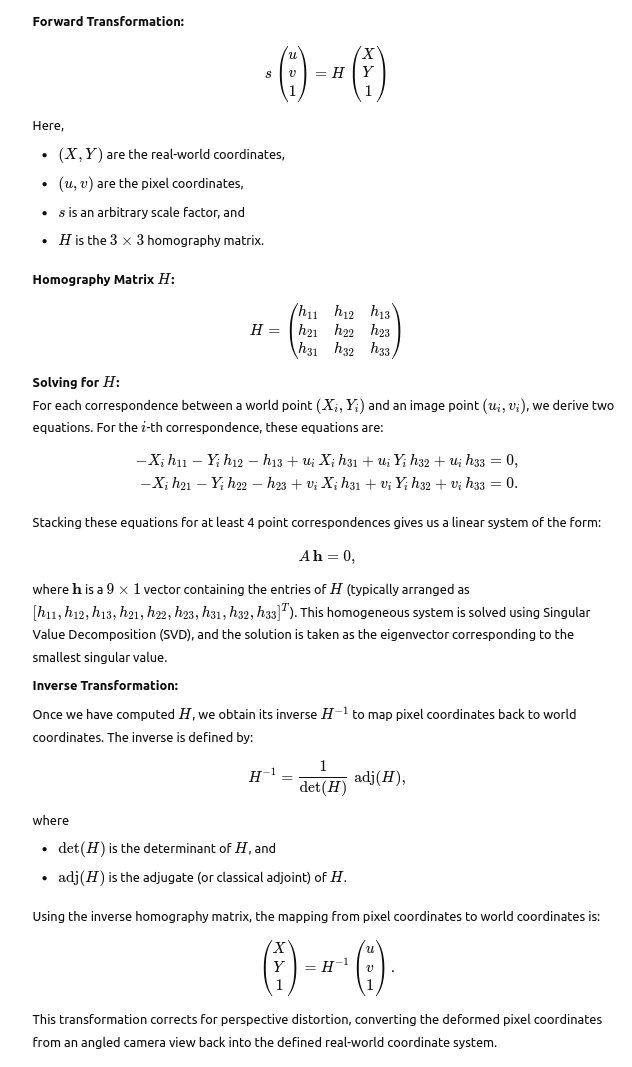

## Generating and Filtering Grid Points

1. **Grid Generation:**  
   We create a dense grid of pixel points that covers the bounding rectangle of the measured corners.

2. **Filtering Grid Points:**  
   Not every point in the bounding rectangle falls inside the actual deformed box. To ensure that only the valid points are transformed, we use a polygon test (via `matplotlib.path.Path`) to filter out grid points that lie outside the quadrilateral defined by our measured corners.

## Transforming Grid Points to Real-World Coordinates

Each grid point that lies within the pixel-defined box is transformed using the inverse homography matrix \(H^{-1}\). This transformation "undoes" the perspective distortion and maps the points into a regular, undistorted coordinate system where:
- The bottom-left of the box is (0, 0)
- The top-right of the box is (width, height)

## Visualization

We create two plots to illustrate the process:

1. **Pixel Coordinate Plot:**  
   - Displays the measured box with its corners marked (in blue) and connected by dashed lines.
   - Shows the filtered grid points inside the box in orange.

2. **Real-World Coordinate Plot:**  
   - Displays the transformed grid points in green.
   - Highlights the box corners in red with dashed lines connecting them to clearly delineate the edges of the box.

This visualization confirms that only the points within the deformed box are mapped, and the resulting real-world grid accurately represents the box with its intended dimensions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# --- Given box dimensions in the real world ---
width = 2.0    # meters
height = 1.0   # meters

# --- Define the corresponding world coordinates for the box corners ---
# Bottom-left, bottom-right, top-right, top-left
world_pts = np.array([
    [0, 0],          # bottom-left
    [width, 0],      # bottom-right
    [width, height], # top-right
    [0, height]      # top-left
])

# --- Measured pixel coordinates for the corresponding box corners ---
# (Ordered as: bottom-left, bottom-right, top-right, top-left)
img_pts = np.array([
    [130, 420],  # bottom-left
    [480, 400],  # bottom-right
    [450, 180],  # top-right
    [150, 300]   # top-left
])

# --- Compute the homography matrix (vectorized) ---
def compute_homography(world_pts, img_pts):
    # Extract coordinates
    X = world_pts[:, 0]  # shape: (N,)
    Y = world_pts[:, 1]  # shape: (N,)
    u = img_pts[:, 0]    # shape: (N,)
    v = img_pts[:, 1]    # shape: (N,)
    
    N = world_pts.shape[0]
    zeros = np.zeros(N)
    ones = np.ones(N)
    
    # Build the two sets of equations for each correspondence
    A1 = np.stack([-X, -Y, -ones, zeros, zeros, zeros, u*X, u*Y, u], axis=1)
    A2 = np.stack([zeros, zeros, zeros, -X, -Y, -ones, v*X, v*Y, v], axis=1)
    
    # Stack them vertically to form A of shape (2N, 9)
    A = np.vstack([A1, A2])
    
    # Solve A*h = 0 using SVD; h is the eigenvector corresponding to the smallest singular value.
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1, :]
    H = h.reshape(3, 3)
    return H

H = compute_homography(world_pts, img_pts)
H_inv = np.linalg.inv(H)

# --- Vectorized pixel-to-world transformation ---
def pixels_to_world(pixels, H_inv):
    """
    Transform an array of pixel coordinates to world coordinates.
    
    Parameters:
      pixels: An array of shape (M, 2) containing pixel coordinates (u, v).
      H_inv:  The inverse homography matrix (3x3).
      
    Returns:
      world_coords: An array of shape (M, 2) containing the world coordinates (X, Y).
    """
    M = pixels.shape[0]
    # Append ones to make homogeneous coordinates: shape becomes (M, 3)
    homogeneous_pixels = np.hstack([pixels, np.ones((M, 1))])
    # Multiply by H_inv (apply transformation to all points at once)
    world_homogeneous = (H_inv @ homogeneous_pixels.T).T
    # Normalize by the third coordinate
    world_homogeneous /= world_homogeneous[:, 2][:, None]
    return world_homogeneous[:, :2]

# --- Generate grid points in the pixel coordinate system that lie inside the box ---
u_min, u_max = img_pts[:, 0].min(), img_pts[:, 0].max()
v_min, v_max = img_pts[:, 1].min(), img_pts[:, 1].max()

# Create a dense grid over the bounding box.
num_points = 25  # adjust resolution as desired
u_vals = np.linspace(u_min, u_max, num_points)
v_vals = np.linspace(v_min, v_max, num_points)
U_grid, V_grid = np.meshgrid(u_vals, v_vals)
grid_points = np.vstack([U_grid.flatten(), V_grid.flatten()]).T

# Use matplotlib's Path to filter out points not in the deformed quadrilateral.
polygon = Path(img_pts)
inside = polygon.contains_points(grid_points)
grid_inside = grid_points[inside]

# Transform all filtered grid points into the world coordinate system (vectorized)
world_grid = pixels_to_world(grid_inside, H_inv)
X_grid, Y_grid = world_grid[:, 0], world_grid[:, 1]

# ----- Visualization 1: Pixel coordinate system with grid points inside the box -----
plt.figure(figsize=(6,6))
plt.scatter(img_pts[:, 0], img_pts[:, 1], color='blue', label='Box Corners')
plt.plot(np.append(img_pts[:, 0], img_pts[0, 0]),
         np.append(img_pts[:, 1], img_pts[0, 1]), 'b--', label='Box Edges')
plt.scatter(grid_inside[:, 0], grid_inside[:, 1], color='orange', s=10, label='Grid Points')
plt.title("Grid Points inside the Box (Pixel Coordinates)")
plt.xlabel("Pixel x")
plt.ylabel("Pixel y")
plt.legend()
plt.gca().invert_yaxis()  # Typical for image coordinate systems.
plt.show()

# ----- Visualization 2: Transformed grid points in the real-world coordinate system -----
plt.figure(figsize=(6,4))
plt.scatter(X_grid, Y_grid, color='green', s=30, label='Grid Points')
# Plot the box corners (world_pts) in a different color.
plt.scatter(world_pts[:, 0], world_pts[:, 1], color='red', s=80, label='Box Corners')
# Draw lines connecting the corners to show the box edges.
pts_world = np.vstack([world_pts, world_pts[0]])  # close the loop
plt.plot(pts_world[:, 0], pts_world[:, 1], 'r--', label='Box Edges')
plt.title("Grid Points Mapped to Real-World Coordinates")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
#plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path

# ---------------------------
# Step 1: Load the cross points from CSV
# ---------------------------
#df = 
#cross_points = 


# ---------------------------
# Step 2: Plot image frame of reference
# ---------------------------

# Plot cross points and polygon in pixel coordinates
plt.figure(figsize=(6,6))
plt.scatter(cross_points[:,0], cross_points[:,1], color='purple', label='Cross Points')
plt.scatter(img_pts[:,0], img_pts[:,1], color='blue', label='Box Corners')
# Draw the polygon edges (close the loop by appending the first point)
plt.plot(np.append(img_pts[:,0], img_pts[0,0]),
         np.append(img_pts[:,1], img_pts[0,1]), 'b--', label='Box Edges')
plt.title("Cross Points in Pixel Coordinates")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.legend()
plt.gca().invert_yaxis()  # Many images have inverted y-axis.
plt.show()

# ---------------------------
# Step 3: Convert Cross Points to World Coordinates
# ---------------------------

# Transform the cross points to world coordinates
#cross_points_world = 

# ---------------------------
# Step 4: Plot the Transformed Points in the Real-World Coordinate System
# ---------------------------
plt.figure(figsize=(6,4))
plt.scatter(cross_points_world[:,0], cross_points_world[:,1], color='purple', s=30, label='Cross Points (World)')
plt.scatter(world_pts[:,0], world_pts[:,1], color='red', s=80, label='Box Corners (World)')
# Draw lines connecting the world points to form the box outline.
pts_world_closed = np.vstack([world_pts, world_pts[0]])
plt.plot(pts_world_closed[:,0], pts_world_closed[:,1], 'r--', label='Box Edges (World)')
plt.title("Cross Points Transformed to World Coordinates")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def generate_cross_points(center, angle_deg, n_points_per_arm=100, sigma=1.0, jitter=0.0):
    """
    Generate cross-shaped points with two arms:
      - Arm 1: oriented at angle_deg (in degrees).
      - Arm 2: oriented at angle_deg - 90 degrees.
    Points along each arm are sampled from a Gaussian distribution (mean=0, std=sigma).
    Optionally, a small perpendicular jitter can be added.

    Parameters:
      center: tuple (x, y) for the center of the cross.
      angle_deg: angle (in degrees) for the first arm.
      n_points_per_arm: number of points to generate per arm.
      sigma: standard deviation of the Gaussian distribution along the arm.
      jitter: standard deviation of perpendicular noise (default 0, i.e., no jitter).
      
    Returns:
      points: a (2*n_points_per_arm, 2) array of x,y coordinates.
    """
    center = np.array(center)
    # Convert angles from degrees to radians.
    angle_rad = np.deg2rad(angle_deg)
    # The second arm is perpendicular.
    angle_perp_rad = np.deg2rad(angle_deg - 90)
    
    # Generate distances along each arm from a Gaussian distribution.
    d1 = np.random.normal(0, sigma, n_points_per_arm)
    d2 = np.random.normal(0, sigma, n_points_per_arm)
    
    # Generate optional perpendicular jitter.
    if jitter > 0:
        jitter1 = np.random.normal(0, jitter, n_points_per_arm)
        jitter2 = np.random.normal(0, jitter, n_points_per_arm)
    else:
        jitter1 = np.zeros(n_points_per_arm)
        jitter2 = np.zeros(n_points_per_arm)
    
    # For each arm, compute points by moving from the center along the arm's direction.
    # Jitter is added perpendicular to the main direction.
    # Arm 1: direction = angle_rad.
    arm1_x = center[0] + d1 * np.cos(angle_rad) + jitter1 * np.cos(angle_rad + np.pi/2)
    arm1_y = center[1] + d1 * np.sin(angle_rad) + jitter1 * np.sin(angle_rad + np.pi/2)
    
    # Arm 2: direction = angle_perp_rad.
    arm2_x = center[0] + d2 * np.cos(angle_perp_rad) + jitter2 * np.cos(angle_perp_rad + np.pi/2)
    arm2_y = center[1] + d2 * np.sin(angle_perp_rad) + jitter2 * np.sin(angle_perp_rad + np.pi/2)
    
    # Combine points from both arms.
    x = np.concatenate([arm1_x, arm2_x])
    y = np.concatenate([arm1_y, arm2_y])
    points = np.column_stack([x, y])
    
    return points

# Example usage:
center = (250, 330)         # Center of the cross
angle_deg = 30          # Angle for the first arm (the second arm will be at -60°)
n_points = 500          # Number of points per arm
sigma = 10.0             # Standard deviation along the arm
jitter = 0.1            # Small perpendicular noise

points = generate_cross_points(center, angle_deg, n_points, sigma, jitter)

# Save the points to a CSV file using pandas.
df = pd.DataFrame(points, columns=["x", "y"])
df.to_csv("cross_points.csv", index=False)
print("Saved cross_points.csv with shape:", points.shape)
